# *1. Objective*
*The objective of this project is to develop a predictive model that can accurately determine the likelihood of survival for passengers aboard the Titanic based on feature like 'PassengerId'.This project aims to not only predict survival outcomes for Titanic passengers but also to demonstrate the practical application of data science techniques and machine learning algorithms in real-world scenarios. The goal is to analyze the Titanic dataset, preprocess and engineer features, apply multiple machine learning algorithms, and optimize the model to achieve the highest possible accuracy.*


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# *2. Data Preprocessing*

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train = train.drop(columns="Cabin", axis=1)
test = test.drop(columns="Cabin", axis=1)

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train['Embarked'].fillna('S', inplace=True)

In [11]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [12]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [13]:
train_age = np.random.randint(train['Age'].mean()-train['Age'].std(), train['Age'].mean()+train['Age'].std(), 177)
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(), test['Age'].mean()+test['Age'].std(), 86)

In [14]:
train['Age'][train['Age'].isnull()]=train_age

In [15]:
test['Age'][test['Age'].isnull()]=test_age

# *3. Exploratory Data Analysis*

In [16]:
train[['Pclass','Survived']].groupby('Pclass').mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [17]:
train[['Sex','Survived']].groupby('Sex').mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


In [18]:
train.groupby(['Embarked'])["Survived"].mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

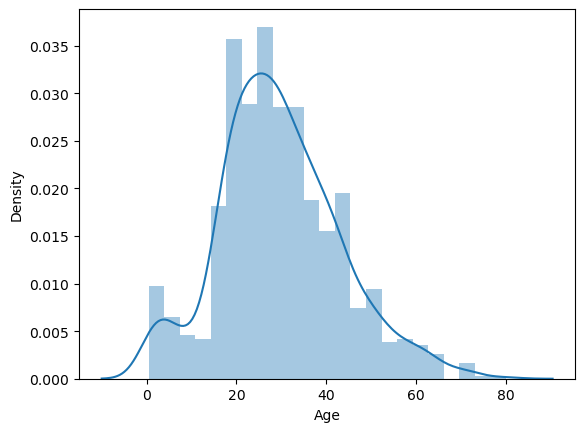

In [19]:
sns.distplot(train['Age'])

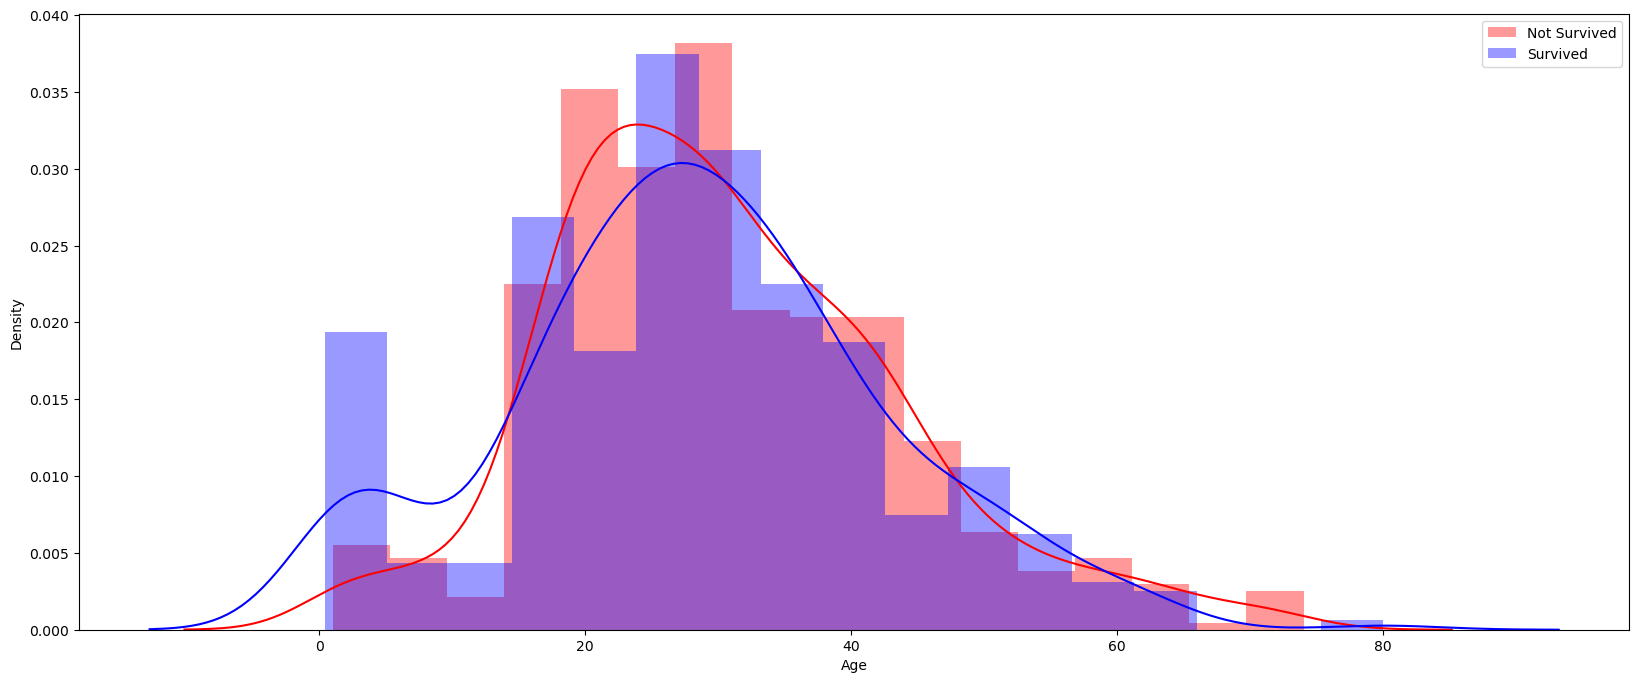

In [20]:
plt.subplots(figsize=(20,8))
sns.distplot(train[train['Survived']==0]['Age'],color='red', label = 'Not Survived')
sns.distplot(train[train['Survived']==1]['Age'],color='blue', label = 'Survived')
plt.legend()
plt.show()

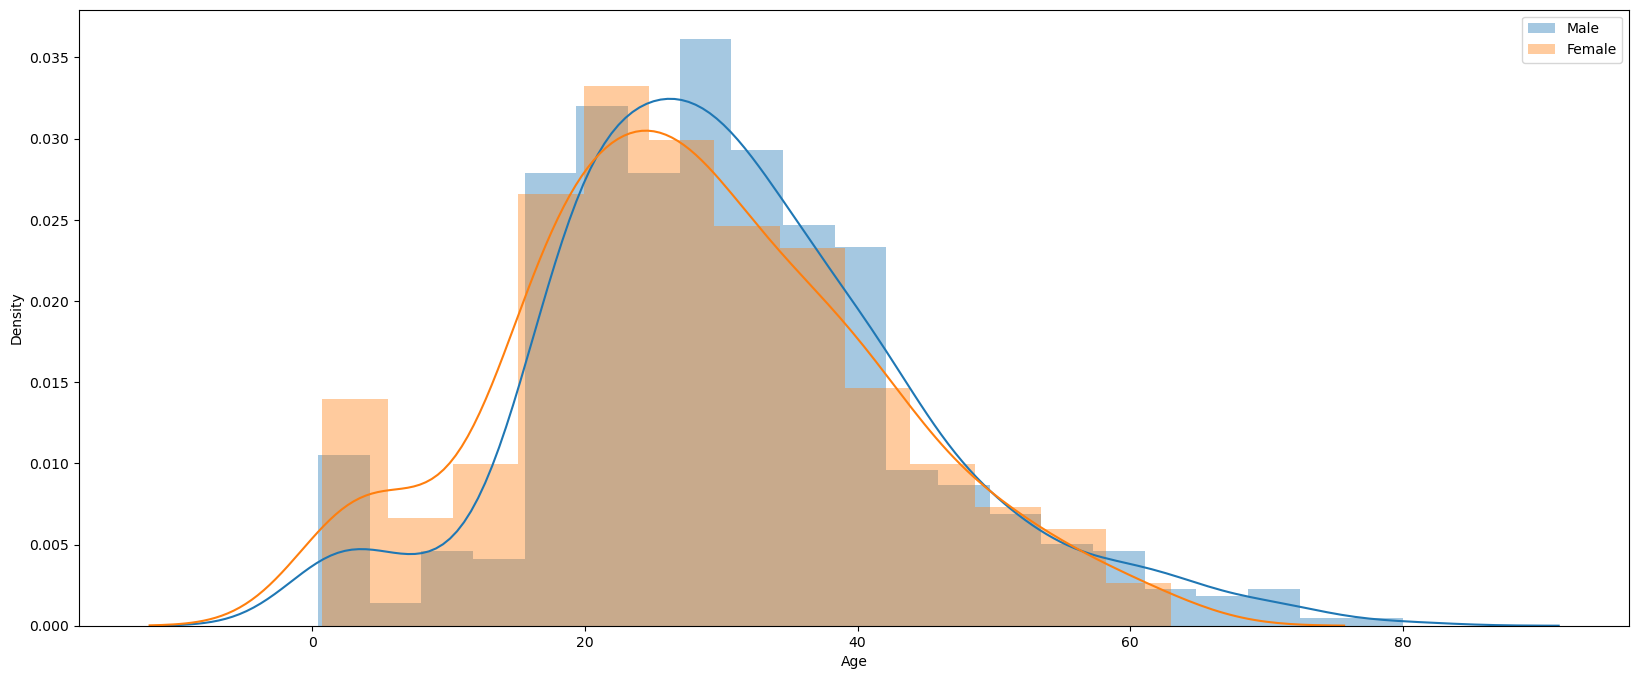

In [21]:
plt.subplots(figsize=(20,8))
sns.distplot(train[train['Sex']=='male']['Age'], label='Male')
sns.distplot(train[train['Sex']=='female']['Age'], label='Female')
plt.legend()
plt.show()

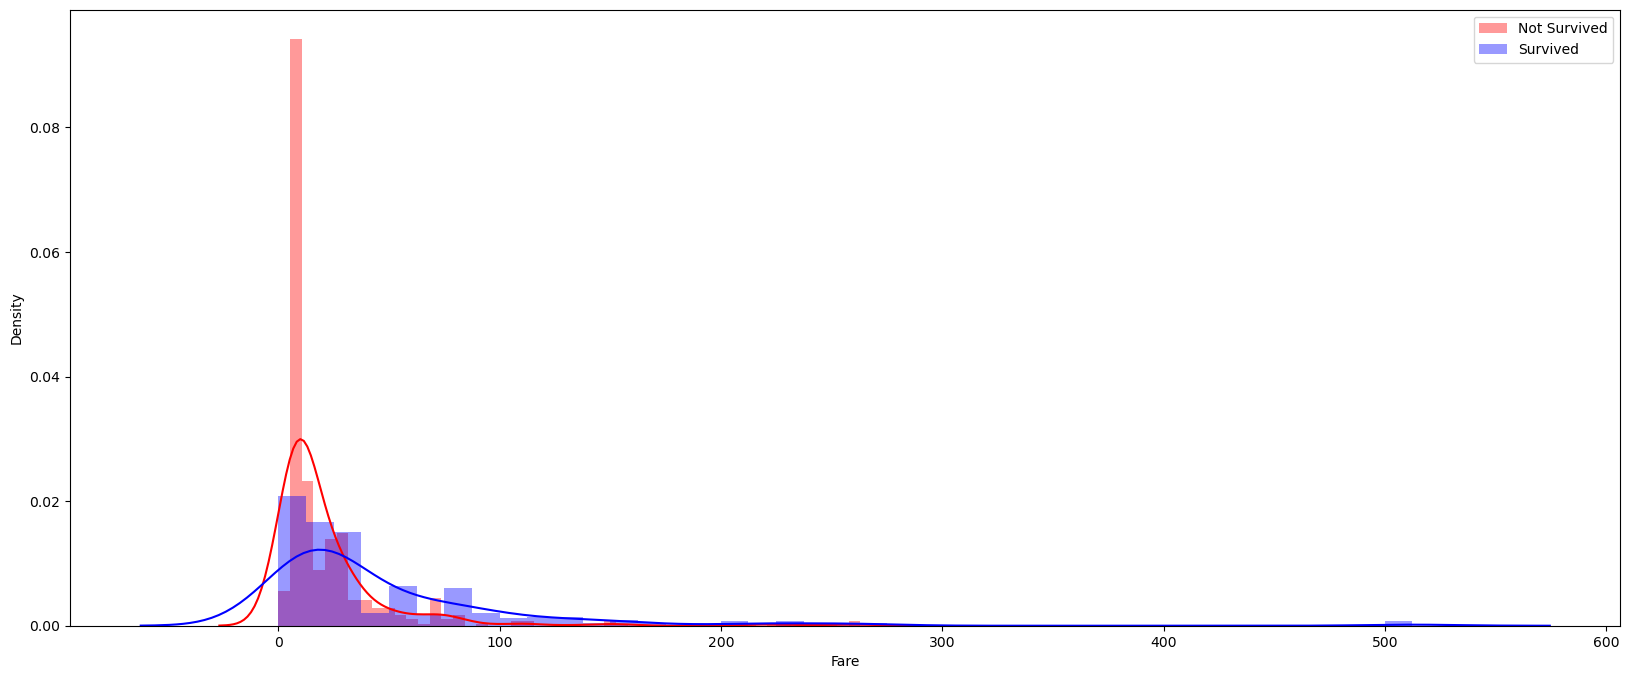

In [22]:
plt.subplots(figsize=(20,8))
sns.distplot(train[train['Survived']==0]['Fare'],color='red', label = 'Not Survived')
sns.distplot(train[train['Survived']==1]['Fare'],color='blue', label = 'Survived')
plt.legend()
plt.show()

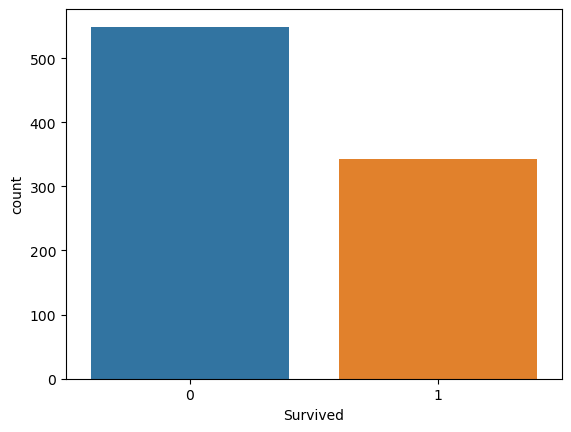

In [23]:
sns.countplot(x='Survived',data=train)
plt.show()

<Axes: ylabel='Survived'>

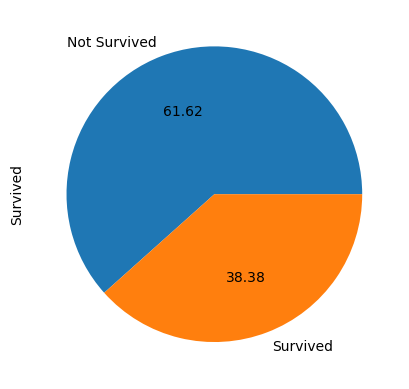

In [24]:
train['Survived'].value_counts().plot(kind='pie', labels=['Not Survived', 'Survived'], autopct = '%0.2f')

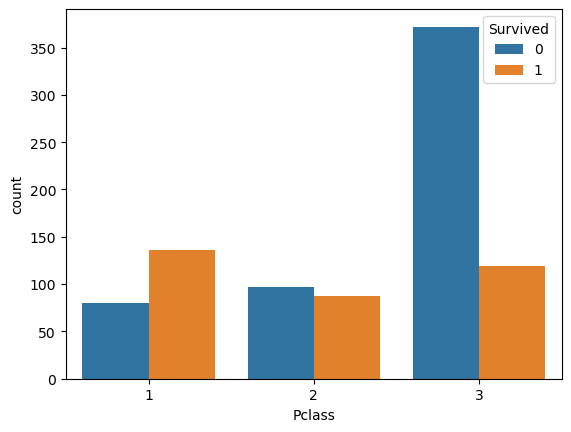

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()  

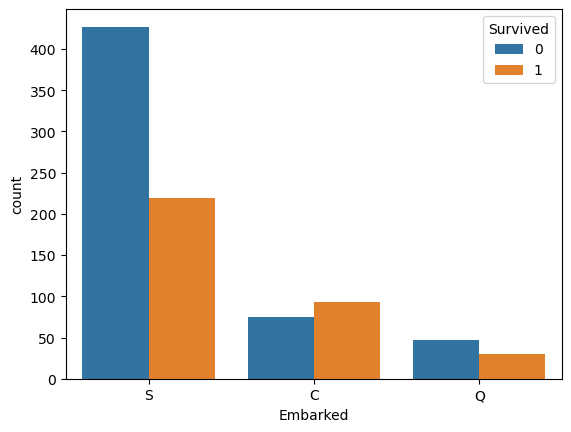

In [26]:
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.show()  

In [27]:
train.drop(columns='Ticket',inplace=True)

In [28]:
test.drop(columns='Ticket',inplace=True)

In [29]:
train['Family'] = train['SibSp']+train['Parch']+1

In [30]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [31]:
train[['Family','Survived']].groupby('Family').mean()*100

,Survived
Family,
1,30.353818
2,55.279503
3,57.843137
4,72.413793
5,20.000000
6,13.636364
7,33.333333
8,0.000000
11,0.000000


In [32]:
test['Family'] = test['SibSp']+test['Parch']+1

In [33]:
test['Family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family, dtype: int64

In [34]:
def fam_size(fm):
    if (fm==1):
        return "Alone"
    elif (fm>1 and fm<5):
        return "Normal Family"
    else:
        return "Large Family"

In [35]:
fam_size(8)

'Large Family'

In [36]:
train['Family_size'] = train['Family'].apply(fam_size)

In [37]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Normal Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Normal Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Normal Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [38]:
test['Family_size'] = test['Family'].apply(fam_size)

In [39]:
train.drop(columns=['SibSp','Parch','Family'], inplace=True)
test.drop(columns=['SibSp','Parch','Family'], inplace=True)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Normal Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Normal Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Normal Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Alone


In [41]:
pId = test['PassengerId'].values

In [42]:
print(train['Name'].count())
print(train['PassengerId'].count())

891
891


In [43]:
train.drop(columns=['Name','PassengerId'], inplace=True)
test.drop(columns=['Name','PassengerId'], inplace=True)

In [44]:
print(train.shape)
print(test.shape)

(891, 7)
(418, 6)


In [45]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [46]:
train = pd.get_dummies(train, columns=['Sex','Embarked','Family_size'],drop_first=True)

In [47]:
test = pd.get_dummies(test, columns=['Sex','Embarked','Family_size'],drop_first=True)

In [48]:
train

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Family_size_Large Family,Family_size_Normal Family
0,0,3,22.0,7.2500,1,0,1,0,1
1,1,1,38.0,71.2833,0,0,0,0,1
2,1,3,26.0,7.9250,0,0,1,0,0
3,1,1,35.0,53.1000,0,0,1,0,1
4,0,3,35.0,8.0500,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,1,0,0
887,1,1,19.0,30.0000,0,0,1,0,0
888,0,3,28.0,23.4500,0,0,1,0,1
889,1,1,26.0,30.0000,1,0,0,0,0


In [49]:
train.describe()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Family_size_Large Family,Family_size_Normal Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.647778,32.204208,0.647587,0.086420,0.725028,0.069585,0.327722
std,0.486592,0.836071,13.540108,49.693429,0.477990,0.281141,0.446751,0.254589,0.469646
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


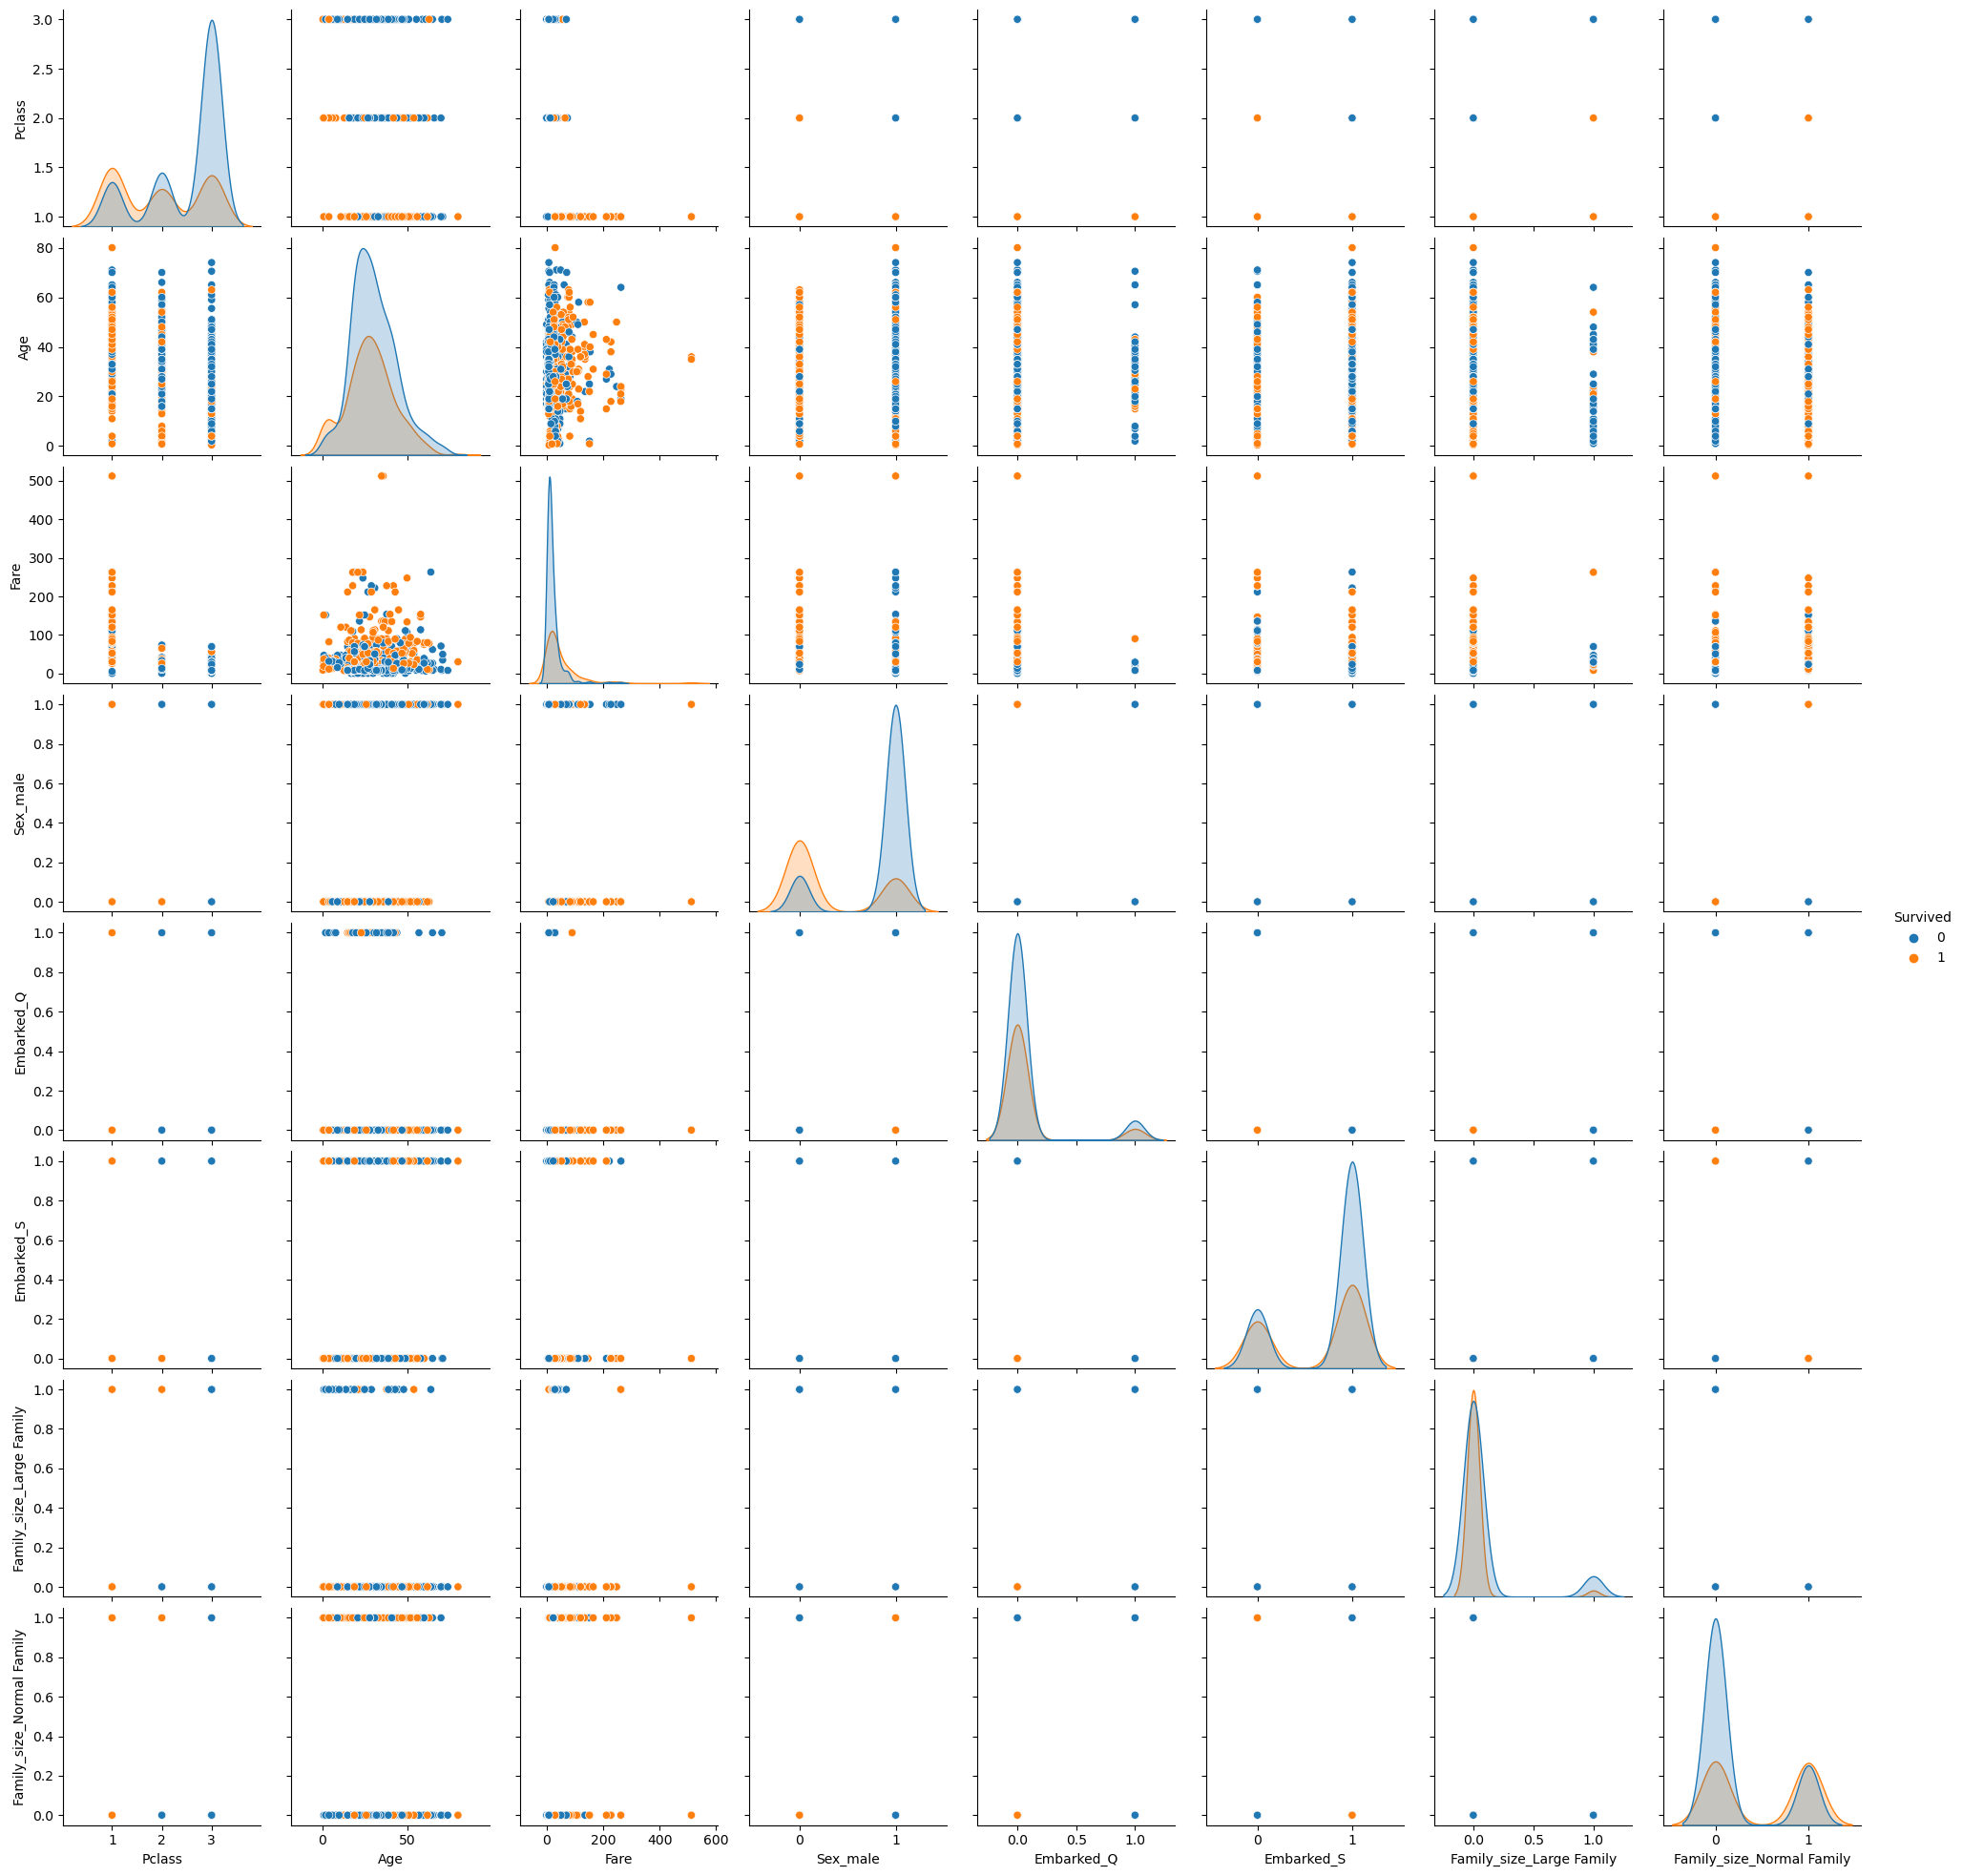

In [50]:
sns.pairplot(train, hue='Survived')

<Axes: >

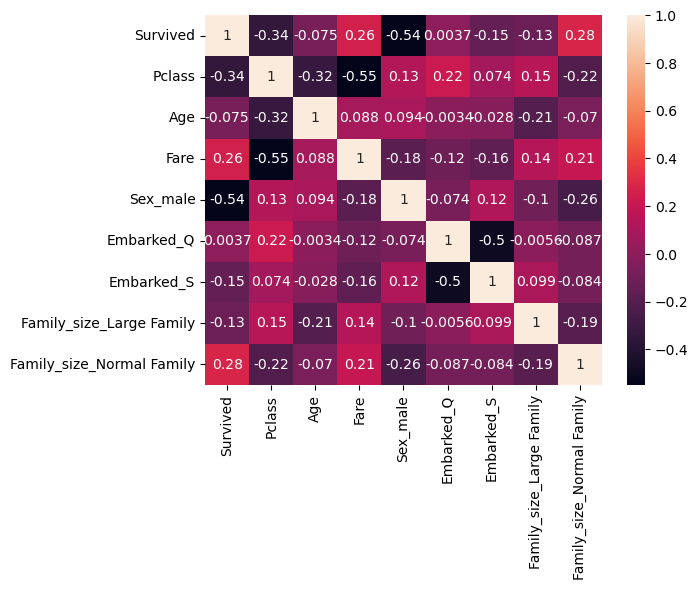

In [51]:
sns.heatmap(train.corr(), annot=True)

# *4. Model Building*

In [52]:
X = train.drop(columns='Survived')
y = train['Survived']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtc=DecisionTreeClassifier()
rtc=RandomForestClassifier(n_estimators=100, random_state=42)

In [55]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
rtc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred=dtc.predict(X_test)

In [58]:
y_pred1=rtc.predict(X_test)

In [59]:
print(accuracy_score(y_test, y_pred))

0.7877094972067039


In [60]:
print(y_pred1)

[0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1]


In [61]:
print(accuracy_score(y_test, y_pred1))

0.8379888268156425


In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rtc, X, y, cv=5)
print(scores.mean())

0.806973824618668


In [63]:
X_final = test.iloc[:,:].values

In [64]:
y_final = rtc.predict(X_final)

In [65]:
result = pd.DataFrame()

In [66]:
result['PasengerId'] = pId
result['Survived'] = y_final

# *5. Result*
*As, we can see the RandomForestClassifir gives us the best accuracy score which is of 82% and using this advantage, we have created a dataframe in which we had taken 'PassengerId' column stored as an array of test dataset to predict whether the passengers survived or not.*

In [67]:
result

,PasengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
import joblib
joblib.dump(rtc, 'RFC_model.pkl')

['RFC_model.pkl']

In [69]:
!pip install pyngrok